import libraries

In [1]:
import cv2
from glob import glob
from matplotlib import pyplot as plt

load image file path

In [2]:
image_files = [f for f in glob('images/*.jpg')]

definition of segmentation algorithm 

In [31]:
def segmentation_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 1)
    equalize = cv2.equalizeHist(blurred)

    threshold = cv2.threshold(equalize, 0, 255,
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]  
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
        threshold, connectivity=8)

    return num_labels, labels, stats, centroids

apply algorithm

C:\Users\shari\AppData\Local\Temp\ipykernel_12684\2686321234.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 10))


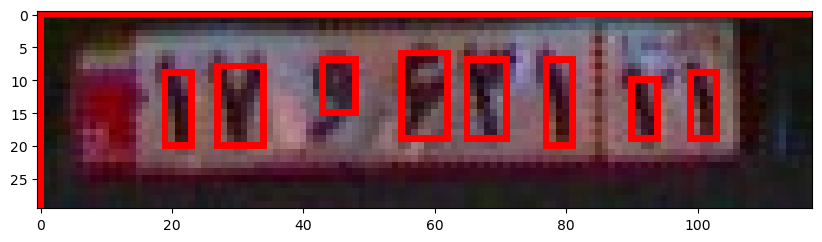

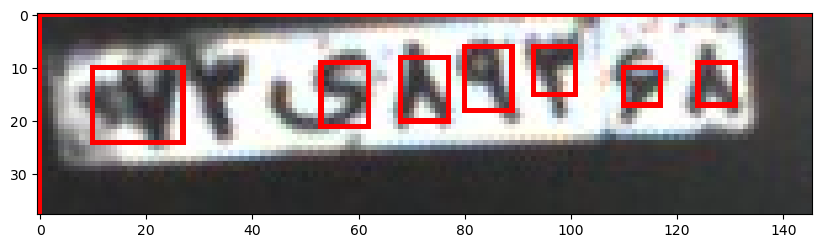

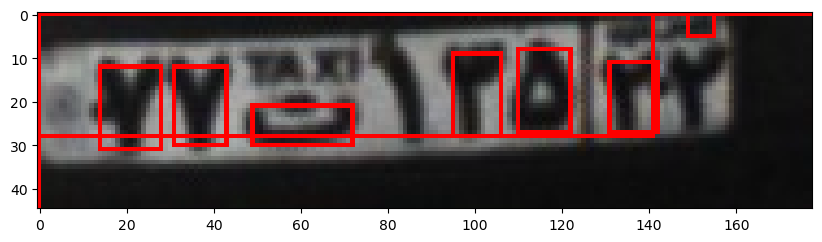

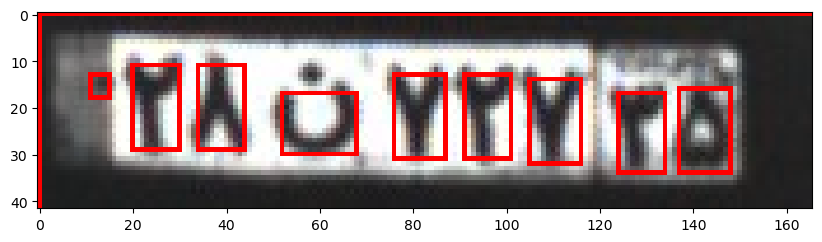

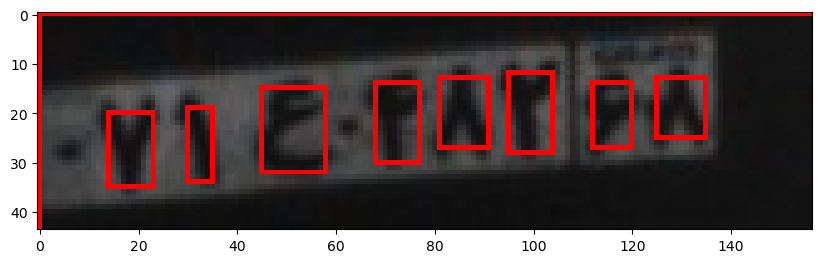

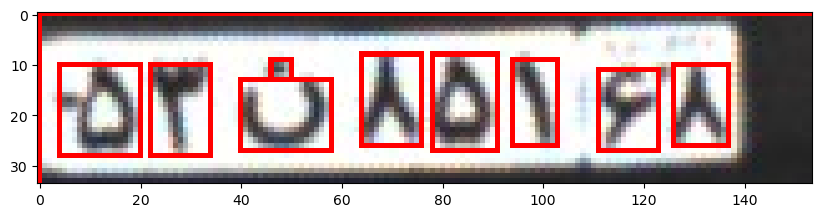

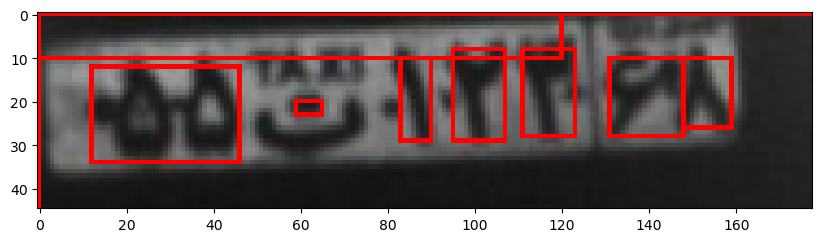

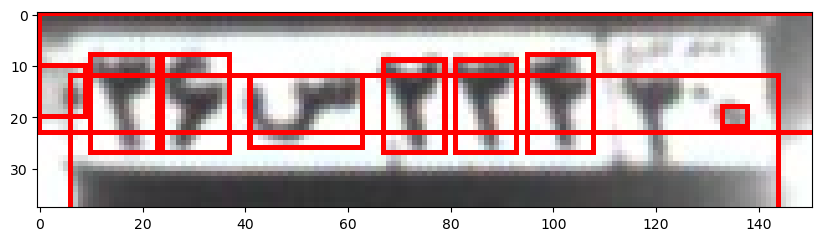

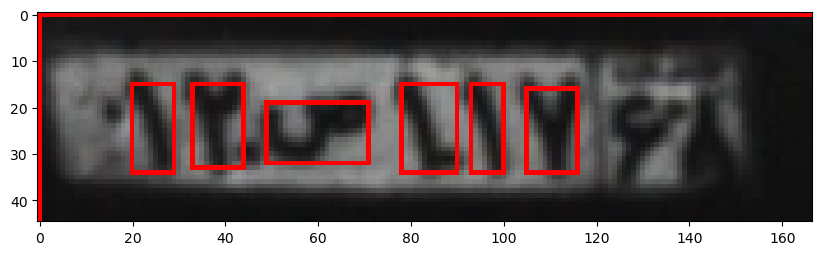

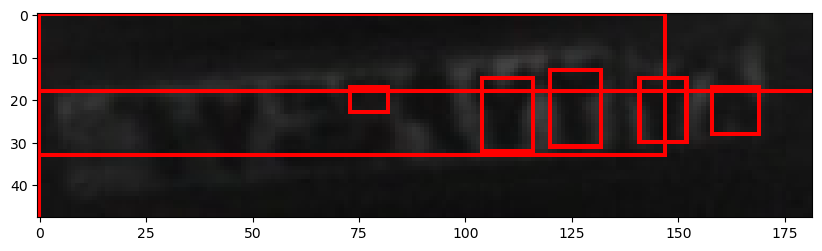

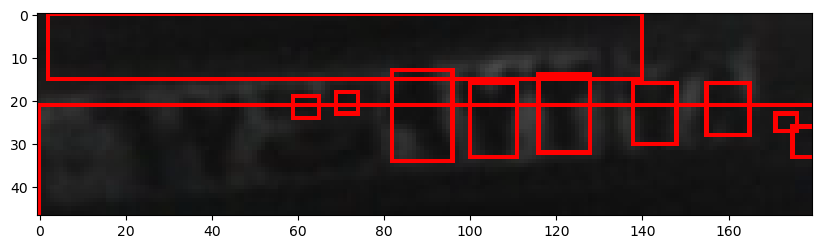

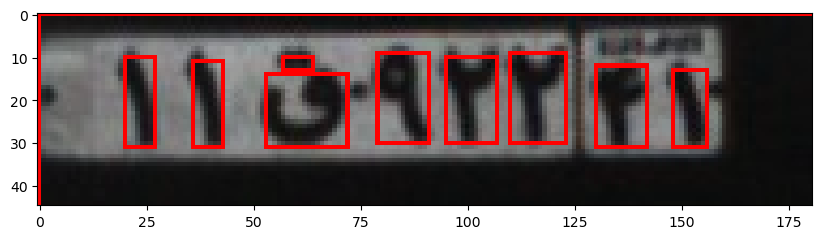

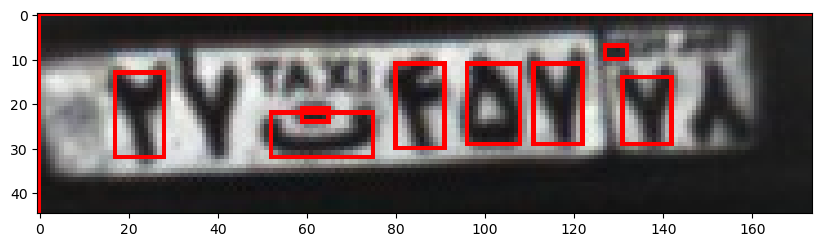

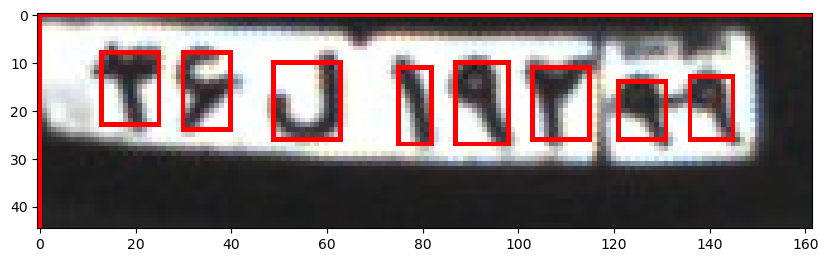

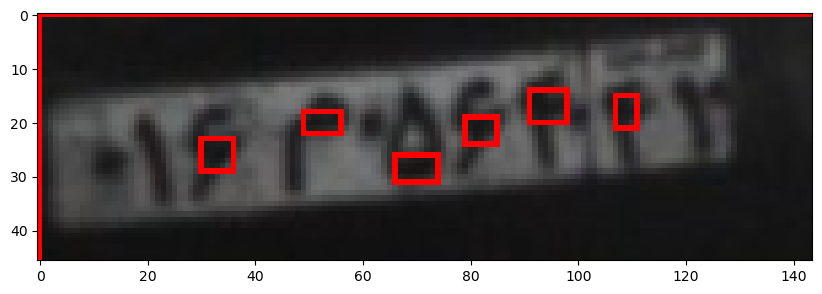

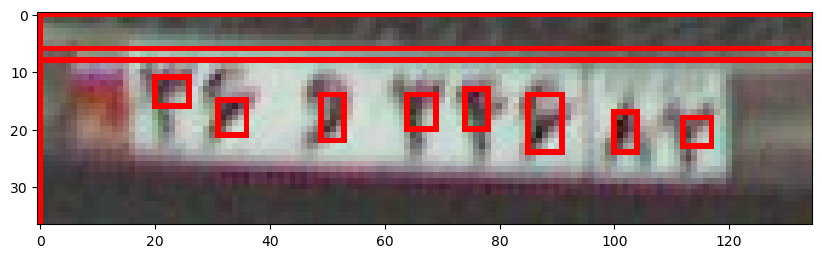

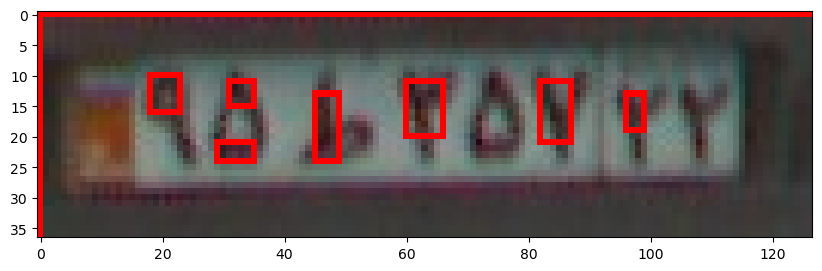

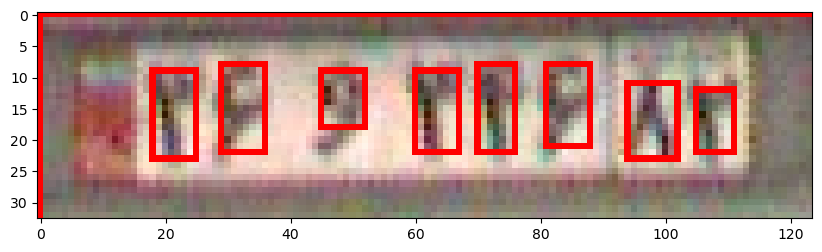

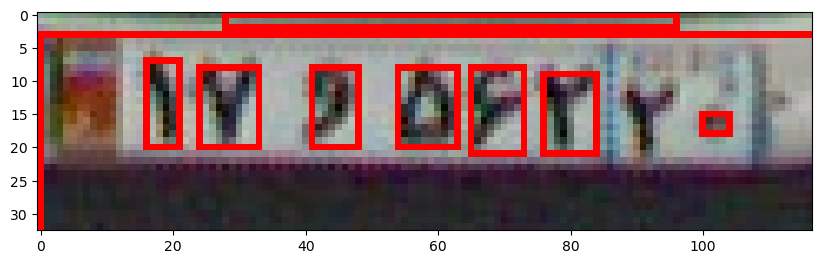

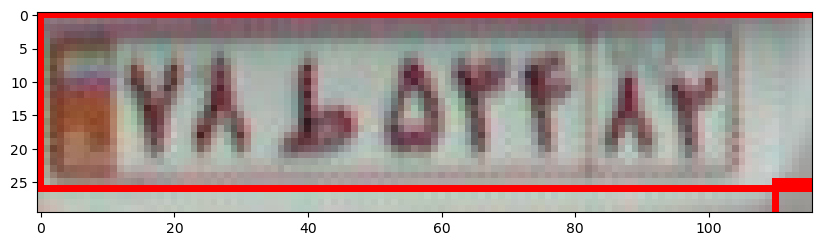

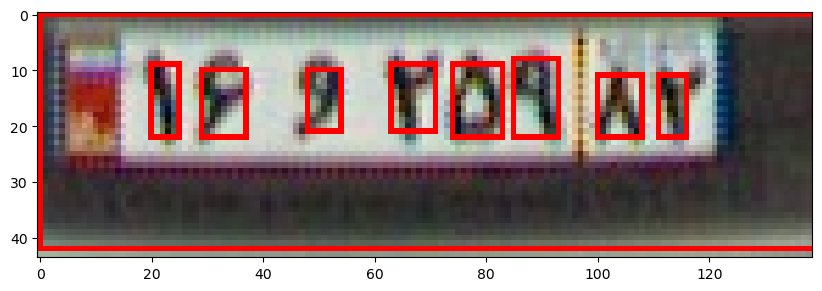

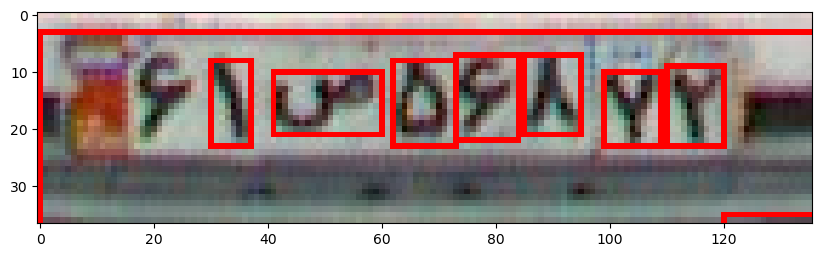

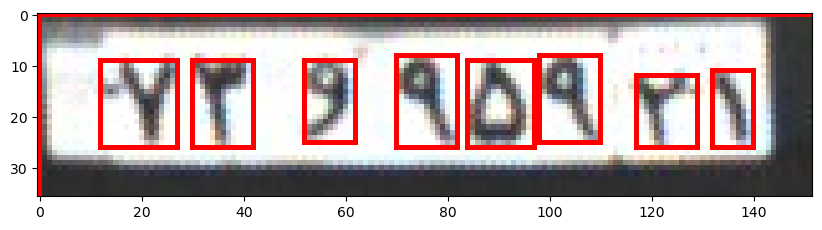

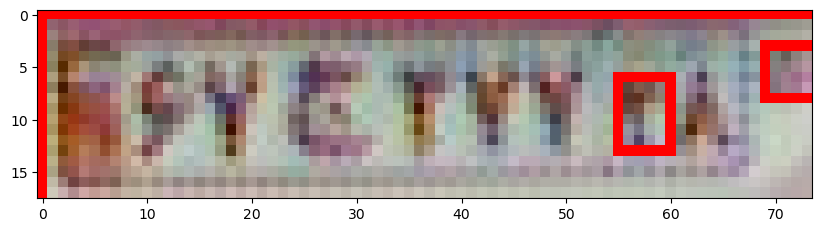

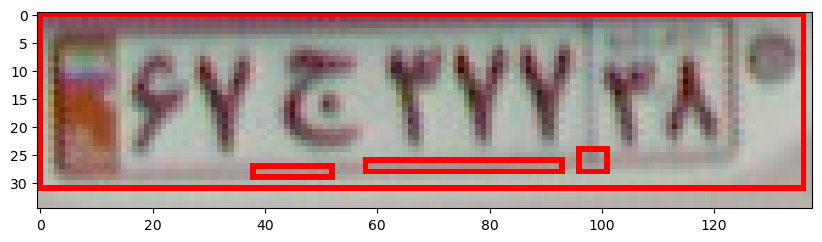

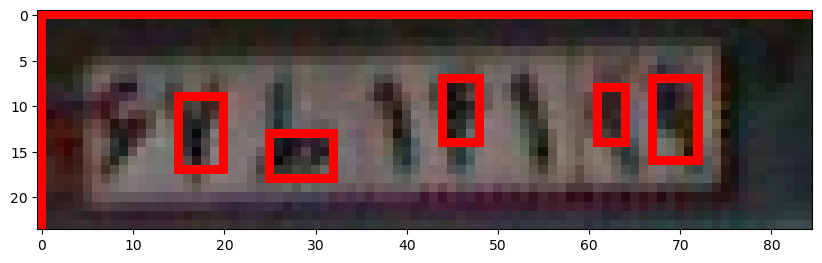

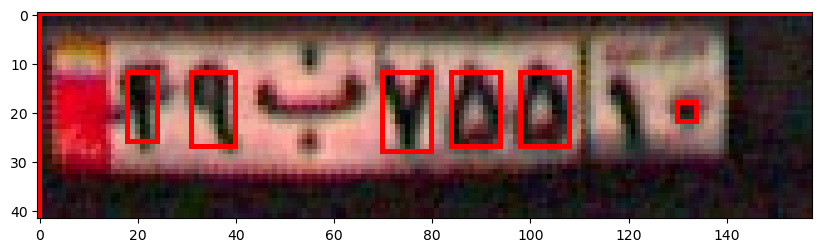

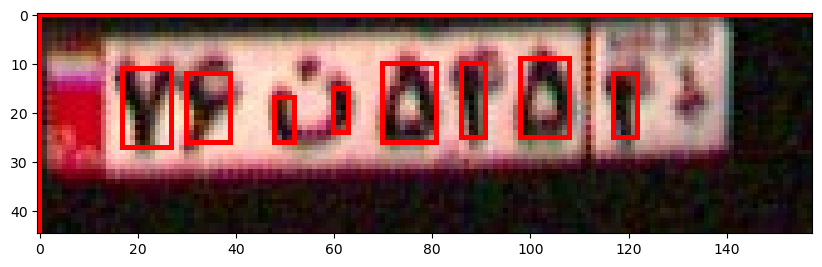

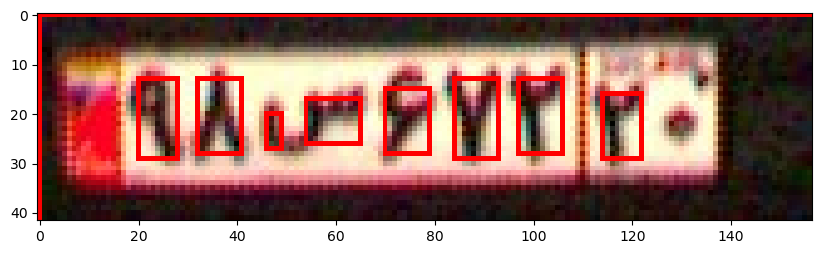

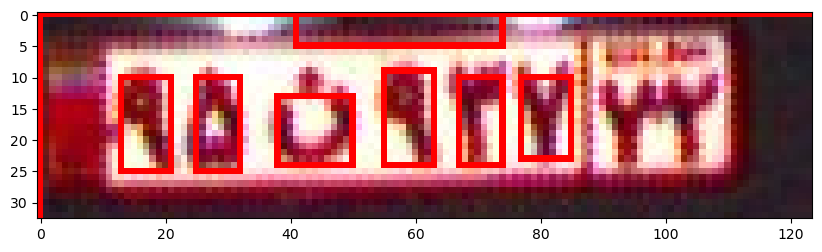

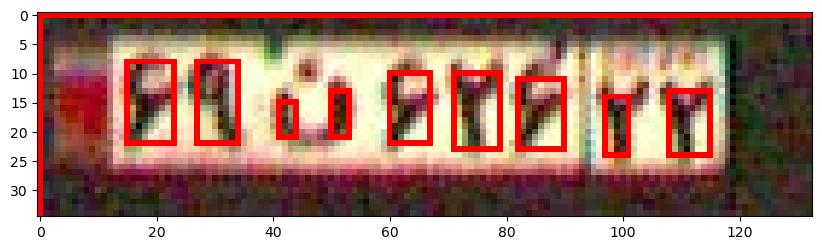

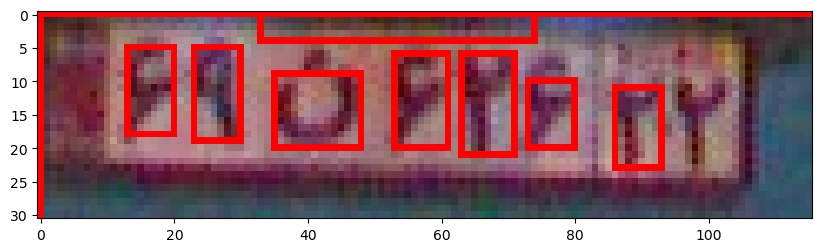

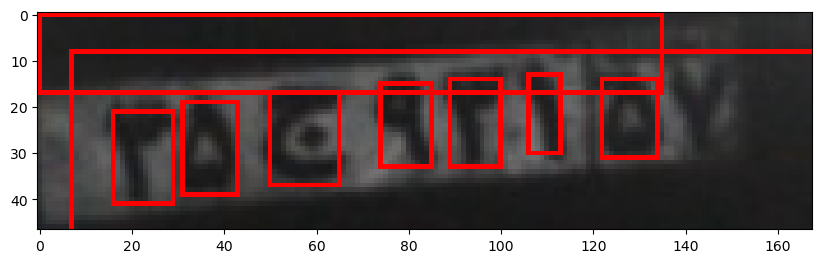

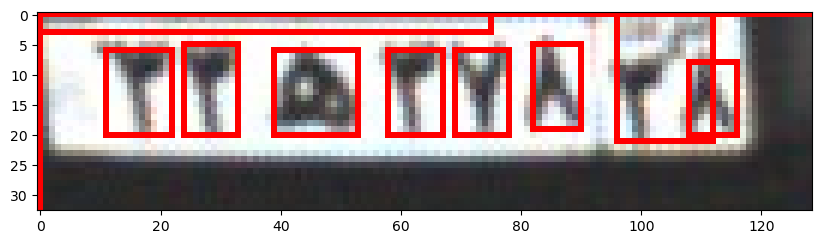

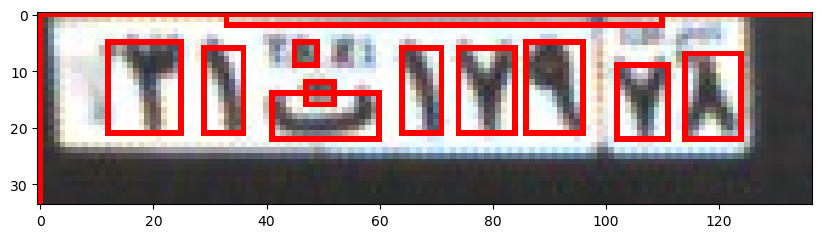

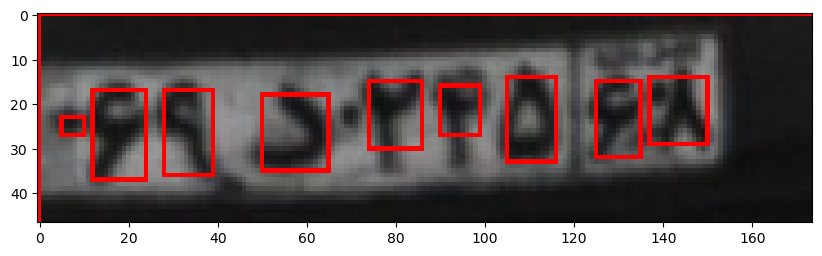

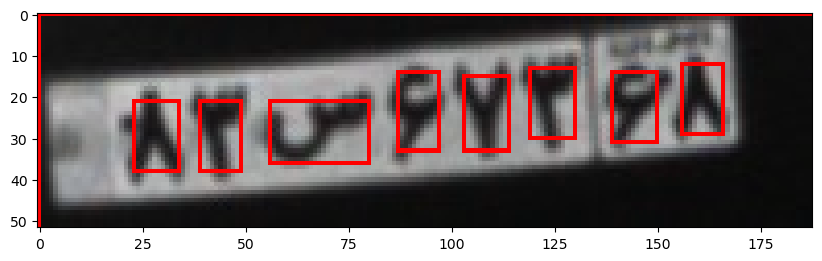

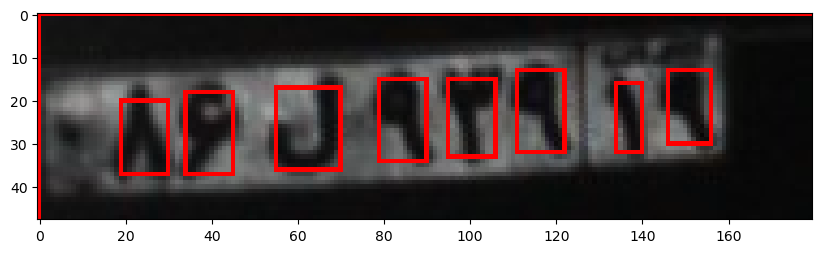

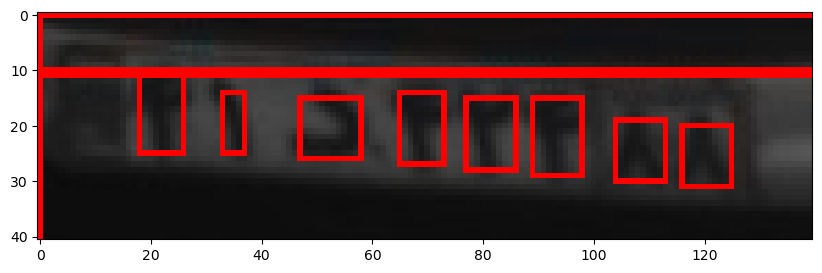

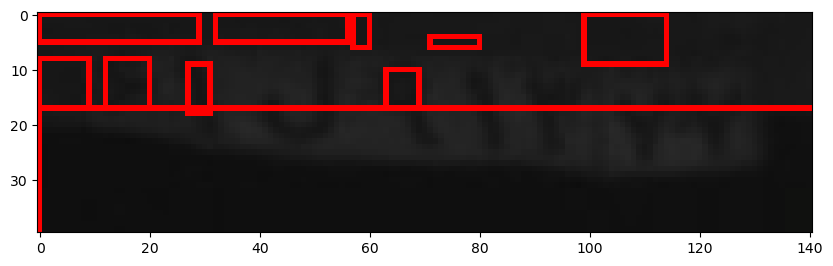

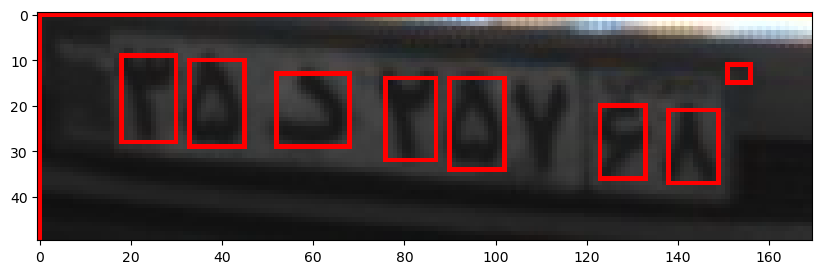

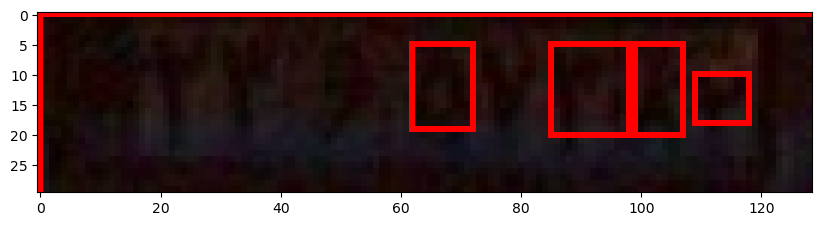

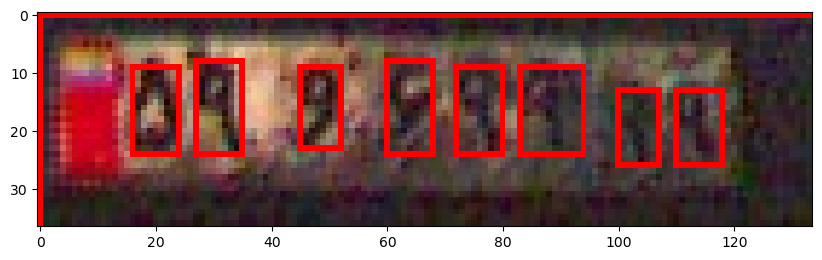

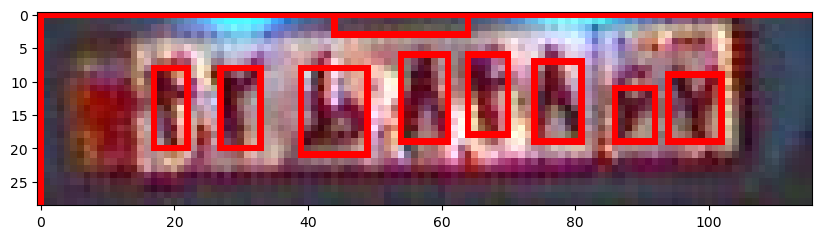

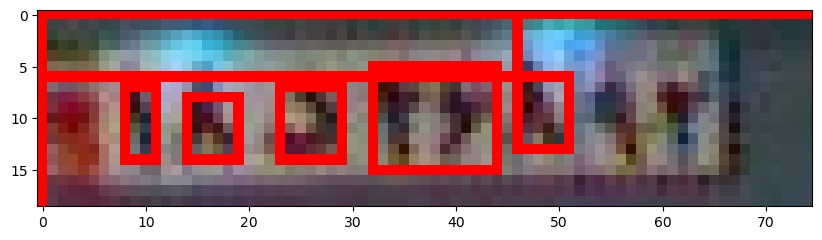

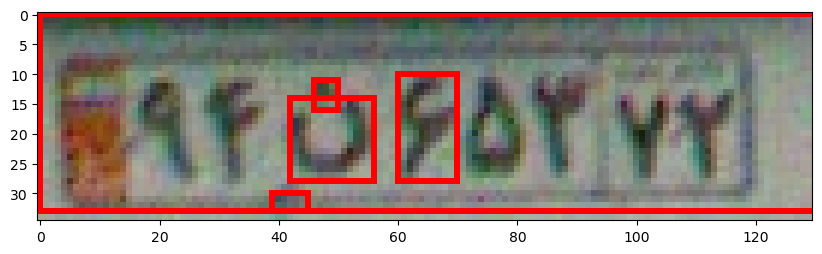

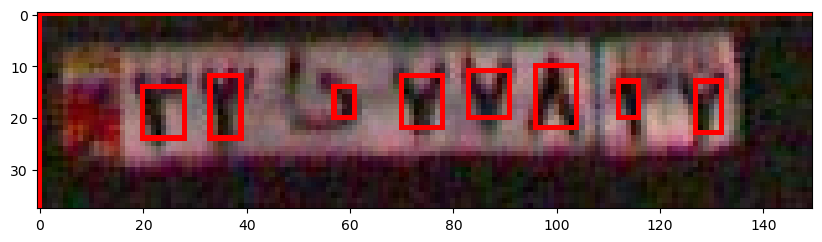

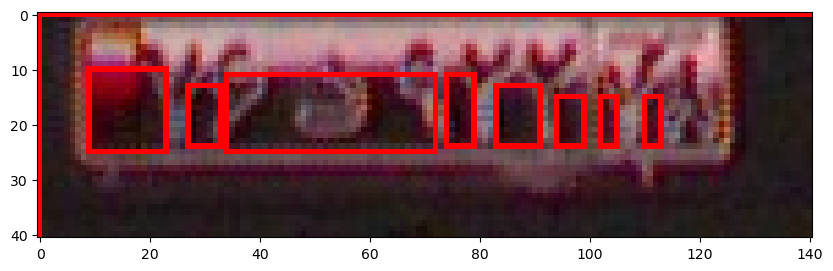

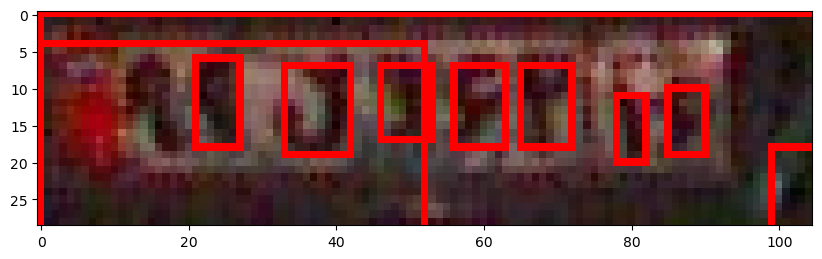

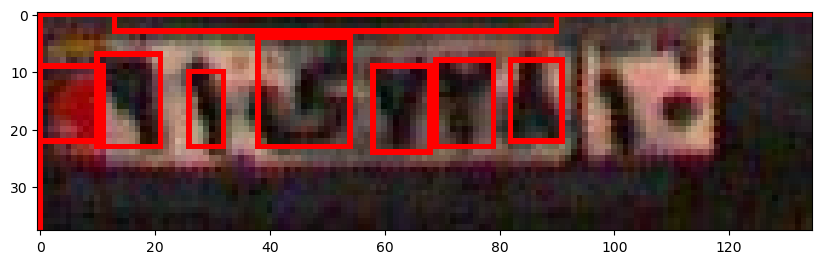

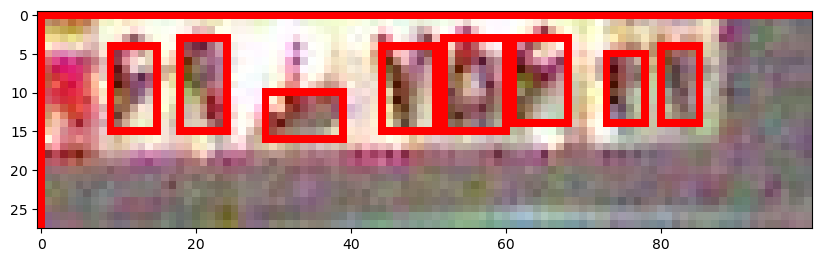

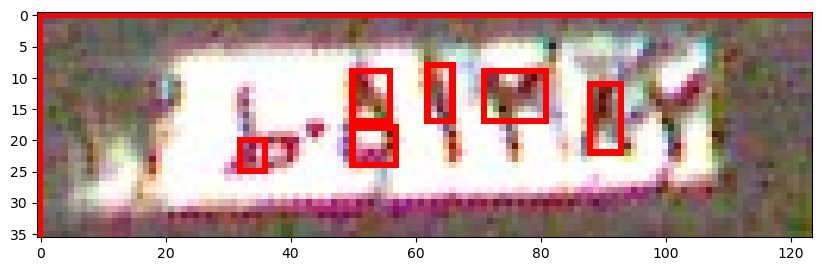

: 

In [36]:
for image_path in image_files:
    image = cv2.imread(image_path)

    num_labels, labels, stats, centroids =  segmentation_plate(image)

    plt.figure(figsize=(10, 10))
    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] > 10:
            x, y, w, h = stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], \
                stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]
        
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 1)

    plt.imshow(image, cmap="gray")